In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# --- Data Preparation ---
df_output = pd.read_csv('../../ics_taxonomies/data/dimensions_outputs/outputs_concat_with_positive_authors.csv')
df_ics = pd.read_csv('../../ics_taxonomies/data/final/enhanced_ref_data.csv')



df_group_uni_ics = (
    df_ics.groupby('Institution name', as_index=False)[
        ['number_people', 'number_male', 'number_female', 'number_unknown']
    ]
    .sum()
)
df_group_uni_ics['pct_female_ics'] = (
    df_group_uni_ics['number_female'] /
    (df_group_uni_ics['number_male'] + df_group_uni_ics['number_female'])
)

df_group_uni_output = (
    df_output.groupby('Institution name', as_index=False)[
        ['number_people', 'number_male', 'number_female', 'number_unknown']
    ]
    .sum()
)
df_group_uni_output['pct_female_output'] = (
    df_group_uni_output['number_female'] /
    (df_group_uni_output['number_male'] + df_group_uni_output['number_female'])
)

df_uni_m = pd.merge(
    df_group_uni_output,
    df_group_uni_ics,
    how='left',
    left_on='Institution name',
    right_on='Institution name',
)



df_group_uoa_ics = (
    df_ics.groupby('Unit of assessment number', as_index=False)[
        ['number_people', 'number_male', 'number_female', 'number_unknown']
    ]
    .sum()
)
df_group_uoa_ics['pct_female_ics'] = df_group_uoa_ics['number_female'] /\
                                     (df_group_uoa_ics['number_male'] + df_group_uoa_ics['number_female'])
df_group_uoa_output = (
    df_output.groupby('Unit of assessment number', as_index=False)[
        ['number_people', 'number_male', 'number_female', 'number_unknown']
    ]
    .sum()
)
df_group_uoa_output['pct_female_output'] = df_group_uoa_output['number_female'] /\
                                        (df_group_uoa_output['number_male'] + df_group_uoa_output['number_female'])
df_uoa_m = pd.merge(df_group_uoa_output,
                    df_group_uoa_ics,
                    how='left',
                    left_on='Unit of assessment number',
                    right_on='Unit of assessment number'
                   )

df_group_uniuoa_ics = (
    df_ics.groupby(['inst_id', 'Unit of assessment number'], as_index=False)[
        ['number_people', 'number_male', 'number_female', 'number_unknown']
    ]
    .sum()
)
df_group_uniuoa_ics['pct_female_ics'] = (
    df_group_uniuoa_ics['number_female'] /
    (df_group_uniuoa_ics['number_male'] + df_group_uniuoa_ics['number_female'])
)

# Outputs grouped by institution + UoA
df_group_uniuoa_output = (
    df_output.groupby(['Institution UKPRN code', 'Unit of assessment number'], as_index=False)[
        ['number_people', 'number_male', 'number_female', 'number_unknown']
    ]
    .sum()
)
df_group_uniuoa_output['pct_female_output'] = (
    df_group_uniuoa_output['number_female'] /
    (df_group_uniuoa_output['number_male'] + df_group_uniuoa_output['number_female'])
)

# Merge on BOTH institution and UoA
df_uniuoa_m = pd.merge(
    df_group_uniuoa_output,
    df_group_uniuoa_ics,
    how='left',
    left_on=['Institution UKPRN code', 'Unit of assessment number'],
    right_on=['inst_id', 'Unit of assessment number'],
    suffixes=('_output', '_ics')
)

df_uniclass = pd.read_csv('/home/porco/Dropbox/ics_work/ics_taxonomies/data/manual/university_category/ref_unique_institutions.csv')
df_uni_m = pd.merge(df_uni_m , df_uniclass, how='left', left_on='Institution name', right_on='Institution name')

# REF 2021 Units of Assessment (from https://2021.ref.ac.uk/panels/units-of-assessment/index.html)
uoa_map = {
    1:  "Clinical Medicine",
    2:  "Public Health, Health Services and Primary Care",
    3:  "Allied Health Professions, Dentistry, Nursing and Pharmacy",
    4:  "Psychology, Psychiatry and Neuroscience",
    5:  "Biological Sciences",
    6:  "Agriculture, Food and Veterinary Sciences",
    7:  "Earth Systems and Environmental Sciences",
    8:  "Chemistry",
    9:  "Physics",
    10: "Mathematical Sciences",
    11: "Computer Science and Informatics",
    12: "Engineering",
    13: "Architecture, Built Environment and Planning",
    14: "Geography and Environmental Studies",
    15: "Archaeology",
    16: "Economics and Econometrics",
    17: "Business and Management Studies",
    18: "Law",
    19: "Politics and International Studies",
    20: "Social Work and Social Policy",
    21: "Sociology",
    22: "Anthropology and Development Studies",
    23: "Education",
    24: "Sport and Exercise Sciences, Leisure and Tourism",
    25: "Area Studies",
    26: "Modern Languages and Linguistics",
    27: "English Language and Literature",
    28: "History",
    29: "Classics",
    30: "Philosophy",
    31: "Theology and Religious Studies",
    32: "Art and Design: History, Practice and Theory",
    33: "Music, Drama, Dance, Performing Arts, Film and Screen Studies",
    34: "Communication, Cultural and Media Studies, Library and Information Management"
}

stem_uoas = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]  # STEM UoAs

df_uoa_m['Unit of assessment name'] = df_uoa_m['Unit of assessment number'].map(uoa_map)

df_uoa_m['Discipline_group'] = np.where(
    df_uoa_m['Unit of assessment number'].isin(stem_uoas),
    'STEM',
    'SHAPE'
)

df_uoa_m.to_csv('uoa_gender.csv')
df_uni_m.to_csv('uni_gender.csv') 
df_uniuoa_m.to_csv('uniunoa_gender.csv') 

In [8]:
df_uni_m

,Institution name,number_people_x,number_male_x,number_female_x,number_unknown_x,pct_female_output,number_people_y,number_male_y,number_female_y,number_unknown_y,pct_female_ics,OxBridge,RussellGroup,Redbrick,Ancient,diff_ics_output
0,AECC University College,68.0,42.0,19.0,7.0,0.311475,7.0,4.0,3.0,0.0,0.428571,0.0,0.0,0.0,0.0,0.117096
1,Abertay University,971.0,496.0,331.0,144.0,0.400242,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
2,Aberystwyth University / Prifysgol Aberystwyth,3643.0,2076.0,893.0,674.0,0.300775,87.0,51.0,27.0,10.0,0.346154,0.0,0.0,0.0,0.0,0.045379
3,Anglia Ruskin University Higher Education Corp...,2338.0,1173.0,818.0,347.0,0.410849,69.0,27.0,34.0,8.0,0.557377,0.0,0.0,0.0,0.0,0.146528
4,"Arts University Bournemouth, the",53.0,28.0,20.0,5.0,0.416667,5.0,2.0,3.0,0.0,0.600000,0.0,0.0,0.0,0.0,0.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,University of the Highlands and Islands,1299.0,659.0,452.0,188.0,0.406841,45.0,24.0,20.0,1.0,0.454545,0.0,0.0,0.0,0.0,0.047705
153,"University of the West of England, Bristol",3363.0,1718.0,1001.0,644.0,0.368150,127.0,60.0,45.0,24.0,0.428571,0.0,0.0,0.0,0.0,0.060421
154,University of the West of Scotland,2180.0,1161.0,604.0,415.0,0.342210,139.0,77.0,43.0,19.0,0.358333,0.0,0.0,0.0,0.0,0.016124
155,Wrexham Glyndŵr University / Prifysgol Glyndŵr...,138.0,57.0,33.0,48.0,0.366667,26.0,17.0,8.0,1.0,0.320000,0.0,0.0,0.0,0.0,-0.046667


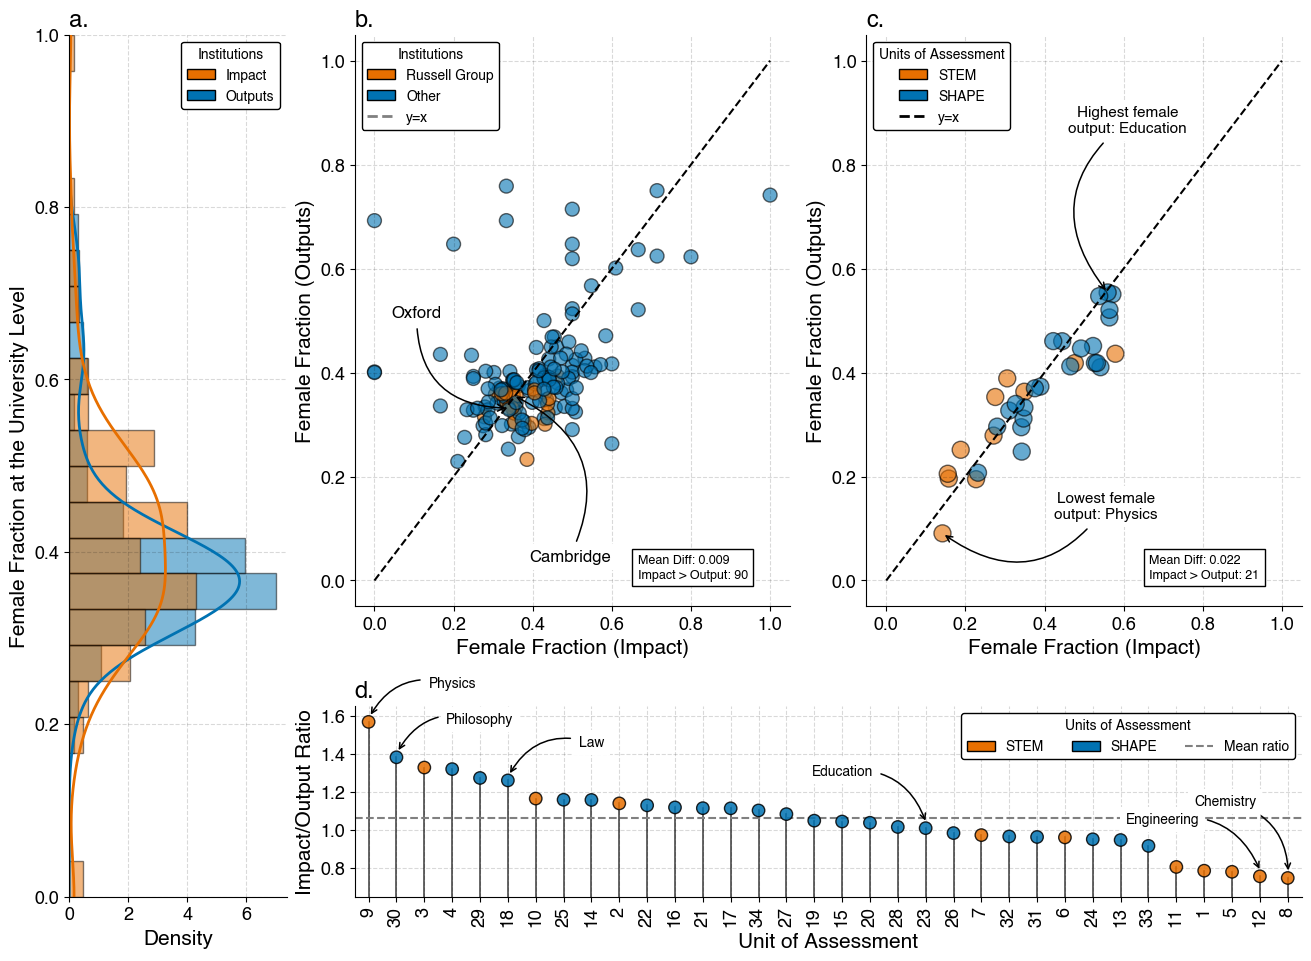

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
from scipy.stats import gaussian_kde

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Helvetica'
# ============================================================
# ---- Create figure with GridSpec ----
# ============================================================

show_unit_names = True

fig = plt.figure(figsize=(13, 9.5), constrained_layout=True)  # taller figure
gs = fig.add_gridspec(
    nrows=2,
    ncols=3,
    width_ratios=[0.8, 1.6, 1.6],
    height_ratios=[3, 1],
)

# ---- Axes ----
axL = fig.add_subplot(gs[:, 0])     # left subplot spanning both rows (a)
ax1 = fig.add_subplot(gs[0, 1])     # top middle (b)
ax2 = fig.add_subplot(gs[0, 2])     # top right (c)
axb = fig.add_subplot(gs[1, 1:3])   # bottom spanning both right columns (d)

# ============================================================
# ---- Colour palette (blue–orange) ----
# ============================================================

COLOR_IMPACT_ORANGE = '#E76F00'  # Impact/STEM/RussellGroup
COLOR_OUTPUT_BLUE   = '#0072B2'  # Output/SHAPE/Other

# ============================================================
# ---- SUBFIGURE b. : Institutions scatter ----
# ============================================================

colors = np.where(df_uni_m['RussellGroup'] == 1, COLOR_IMPACT_ORANGE, COLOR_OUTPUT_BLUE)

ax1.scatter(
    df_uni_m['pct_female_ics'],
    df_uni_m['pct_female_output'],
    alpha=0.6,
    s=100,
    c=colors,
    edgecolor='k'
)
ax1.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=1.5)

mean_diff_uni = (df_uni_m['pct_female_ics'] - df_uni_m['pct_female_output']).mean()
n_more_output_uni = (df_uni_m['pct_female_ics'] > df_uni_m['pct_female_output']).sum()

ax1.text(
    0.65, 0.05,
    f"Mean Diff: {mean_diff_uni:.3f}\nImpact > Output: {n_more_output_uni}",
    transform=ax1.transAxes,
    fontsize=9,
    bbox=dict(facecolor='white', alpha=1)
)

ax1.set_xlim(-0.05, 1.05)
ax1.set_ylim(-0.05, 1.05)
ax1.set_xticks(np.linspace(0, 1, 6))
ax1.set_yticks(np.linspace(0, 1, 6))
ax1.set_xlabel('Female Fraction (Impact)', fontsize=15)
ax1.set_ylabel('Female Fraction (Outputs)', fontsize=15)
ax1.set_title('b.', loc='left', fontweight='bold', fontsize=17)
ax1.grid(linestyle='--', color='k', alpha=0.15)

legend_elements_a = [
    Patch(facecolor=COLOR_IMPACT_ORANGE, edgecolor='k', label='Russell Group'),
    Patch(facecolor=COLOR_OUTPUT_BLUE,   edgecolor='k', label='Other'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='y=x')
]
ax1.legend(
    handles=legend_elements_a,
    title='Institutions',
    loc='upper left',
    frameon=True,
    edgecolor='k',
    facecolor=(1, 1, 1, 1),
    framealpha=1.0
)

# -------------------- ANNOTATIONS for ax1 (Institutions) --------------------
_ox = df_uni_m[df_uni_m['Institution name'] == 'University of Oxford']
if not _ox.empty:
    _x, _y = _ox[['pct_female_ics', 'pct_female_output']].values[0]
    ax1.annotate(
        "Oxford",
        xy=(_x, _y),
        xytext=(0.20, 0.50),
        textcoords='axes fraction',
        fontsize=12,
        ha='right',
        va='bottom',
        arrowprops=dict(arrowstyle='->', lw=1.1, color='k', connectionstyle="arc3,rad=0.5"),
        bbox=dict(facecolor='white', edgecolor='none', alpha=1)
    )

_cam = df_uni_m[df_uni_m['Institution name'] == 'University of Cambridge']
if not _cam.empty:
    _x, _y = _cam[['pct_female_ics', 'pct_female_output']].values[0]
    ax1.annotate(
        "Cambridge",
        xy=(_x, _y),
        xytext=(0.40, 0.10),
        textcoords='axes fraction',
        fontsize=12,
        ha='left',
        va='top',
        arrowprops=dict(arrowstyle='->', lw=1.1, color='k', connectionstyle="arc3,rad=0.5"),
        bbox=dict(facecolor='white', edgecolor='none', alpha=1)
    )
# ---------------------------------------------------------------------------

# ============================================================
# ---- SUBFIGURE c. : Units of Assessment scatter ----
# ============================================================

colors_uoa = np.where(df_uoa_m['Discipline_group'].eq('STEM'),
                      COLOR_IMPACT_ORANGE, COLOR_OUTPUT_BLUE)

ax2.scatter(
    df_uoa_m['pct_female_ics'],
    df_uoa_m['pct_female_output'],
    alpha=0.6,
    s=150,
    c=colors_uoa,
    edgecolor='k'
)
ax2.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=1.5)

mean_diff_uoa = (df_uoa_m['pct_female_ics'] - df_uoa_m['pct_female_output']).mean()
n_more_output_uoa = (df_uoa_m['pct_female_ics'] > df_uoa_m['pct_female_output']).sum()

ax2.text(
    0.65, 0.05,
    f"Mean Diff: {mean_diff_uoa:.3f}\nImpact > Output: {n_more_output_uoa}",
    transform=ax2.transAxes,
    fontsize=9,
    bbox=dict(facecolor='white', alpha=1)
)

ax2.set_xlim(-0.05, 1.05)
ax2.set_ylim(-0.05, 1.05)
ax2.set_xticks(np.linspace(0, 1, 6))
ax2.set_yticks(np.linspace(0, 1, 6))
ax2.set_xlabel('Female Fraction (Impact)', fontsize=15)
ax2.set_ylabel('Female Fraction (Outputs)', fontsize=15)
ax2.set_title('c.', loc='left', fontweight='bold', fontsize=17)
ax2.grid(linestyle='--', color='k', alpha=0.15)

legend_elements_b = [
    Patch(facecolor=COLOR_IMPACT_ORANGE, edgecolor='k', label='STEM'),
    Patch(facecolor=COLOR_OUTPUT_BLUE,   edgecolor='k', label='SHAPE'),
    Line2D([0], [0], color='k', lw=2, linestyle='--', label='y=x')
]
ax2.legend(
    handles=legend_elements_b,
    title='Units of Assessment',
    loc='upper left',
    frameon=True,
    edgecolor='k',
    facecolor=(1, 1, 1, 1),
    framealpha=1.0
)

# -------------------- ANNOTATIONS for ax2 (UoAs) --------------------
_idx_max = df_uoa_m['pct_female_output'].idxmax()
_idx_min = df_uoa_m['pct_female_output'].idxmin()

_row_max = df_uoa_m.loc[[_idx_max]]
_row_min = df_uoa_m.loc[[_idx_min]]

_x_max, _y_max = _row_max[['pct_female_ics', 'pct_female_output']].values[0]
_x_min, _y_min = _row_min[['pct_female_ics', 'pct_female_output']].values[0]

if show_unit_names:
    _label_max = f"Highest female\noutput: {_row_max['Unit of assessment name'].values[0]}"
    _label_min = f"Lowest female\noutput: {_row_min['Unit of assessment name'].values[0]}"
else:
    _label_max = f"Highest female output: UoA {int(_row_max['Unit of assessment number'].values[0])}"
    _label_min = f"Lowest female output: UoA {int(_row_min['Unit of assessment number'].values[0])}"

ax2.annotate(
    _label_max,
    xy=(_x_max, _y_max),
    xytext=(0.60, 0.85),
    textcoords='axes fraction',
    fontsize=11,
    ha='center',
    va='center',
    arrowprops=dict(arrowstyle='->', lw=1.1, color='k', connectionstyle="arc3,rad=0.5"),
    bbox=dict(facecolor='white', edgecolor='none', alpha=1)
)

ax2.annotate(
    _label_min,
    xy=(_x_min, _y_min),
    xytext=(0.55, 0.175),
    textcoords='axes fraction',
    fontsize=11,
    ha='center',
    va='center',
    arrowprops=dict(arrowstyle='->', lw=1.1, color='k', connectionstyle="arc3,rad=-0.5"),
    bbox=dict(facecolor='white', edgecolor='none', alpha=1)
)
# --------------------------------------------------------------------

# ============================================================
# ---- SUBFIGURE a. : LEFT PANEL (rotated distributions) ----
# ============================================================

ics = df_uni_m['pct_female_ics'].dropna()
output = df_uni_m['pct_female_output'].dropna()
bins = np.linspace(0, 1, 25)

axL.hist(output, bins=bins, density=True, alpha=0.5, label='Outputs',
         edgecolor='k', orientation='horizontal', color=COLOR_OUTPUT_BLUE)
axL.hist(ics, bins=bins, density=True, alpha=0.5, label='Impact',
         edgecolor='k', orientation='horizontal', color=COLOR_IMPACT_ORANGE)

x = np.linspace(0, 1, 400)
axL.plot(gaussian_kde(output)(x), x, color=COLOR_OUTPUT_BLUE,   lw=2)
axL.plot(gaussian_kde(ics)(x),    x, color=COLOR_IMPACT_ORANGE, lw=2)

axL.set_ylim(0, 1)
axL.set_yticks(np.linspace(0, 1, 6))
axL.set_xlabel('Density', fontsize=15)
axL.set_ylabel('Female Fraction at the University Level', fontsize=15)
axL.set_title('a.', loc='left', fontweight='bold', fontsize=17)
axL.grid(linestyle='--', color='k', alpha=0.15)
axL.spines['top'].set_visible(False)
axL.spines['right'].set_visible(False)

legend_elements_dist = [
    Patch(facecolor=COLOR_IMPACT_ORANGE, edgecolor='k', label='Impact'),
    Patch(facecolor=COLOR_OUTPUT_BLUE,   edgecolor='k', label='Outputs')
]
axL.legend(
    handles=legend_elements_dist,
    title='Institutions',
    loc='upper right',
    frameon=True,
    edgecolor='k',
    facecolor=(1, 1, 1, 1),
    framealpha=1.0
)

# ============================================================
# ---- SUBFIGURE d. : Bottom panel — ratio DOT plot (UoA numbers) ----
# ============================================================

ratio_series = (
    df_uoa_m.set_index('Unit of assessment number')
    .assign(ratio=lambda x: x['pct_female_ics'] / x['pct_female_output'])
    ['ratio']
    .dropna()
    .sort_values(ascending=False)
)

# Colour points by Discipline_group (SHAPE / STEM)
disc_map = df_uoa_m.set_index('Unit of assessment number')['Discipline_group']
dot_colors = [COLOR_IMPACT_ORANGE if disc_map.get(num) == 'STEM' else COLOR_OUTPUT_BLUE
              for num in ratio_series.index]

positions = np.arange(len(ratio_series))

# Black stems (lollipop style)
for x_pos, y_val in zip(positions, ratio_series.values):
    axb.plot([x_pos, x_pos], [0, y_val], color='k', lw=1.2, alpha=0.7, zorder=1)

# Dots
axb.scatter(
    positions, ratio_series.values,
    c=dot_colors, edgecolor='k', s=80, alpha=0.85, zorder=3
)

# Mean horizontal line
mean_ratio = ratio_series.mean()
axb.axhline(mean_ratio, color='gray', linestyle='--', lw=1.5,
            label=f'Mean = {mean_ratio:.2f}', zorder=2)

# Axes labels and styling
axb.set_title('d.', loc='left', fontweight='bold', fontsize=17)
axb.set_ylabel('Impact/Output Ratio', fontsize=15)
axb.set_xlabel('Unit of Assessment', fontsize=15)
axb.grid(linestyle='--', color='k', alpha=0.15)

axb.set_xlim(-0.5, len(ratio_series) - 0.5)
axb.set_xticks(positions)
axb.set_xticklabels(ratio_series.index, rotation=90, fontsize=8)
axb.tick_params(axis='y', labelsize=11)

# Legend
legend_elements_d = [
    Patch(facecolor=COLOR_IMPACT_ORANGE, edgecolor='k', label='STEM'),
    Patch(facecolor=COLOR_OUTPUT_BLUE,   edgecolor='k', label='SHAPE'),
    Line2D([0], [0], color='gray', lw=1.5, linestyle='--', label='Mean ratio')
]
axb.legend(
    handles=legend_elements_d,
    loc='upper right',
    frameon=True,
    ncol=3,
    title='Units of Assessment',
    edgecolor='k',
    facecolor=(1, 1, 1, 1),
    framealpha=1.0
)

# -------------------- ANNOTATIONS for selected UoAs on axb --------------------
uoas_to_annotate = [9, 30, 18, 12, 8, 23]

for uoa_num in uoas_to_annotate:
    if uoa_num in ratio_series.index:
        x_pos = list(ratio_series.index).index(uoa_num)
        y_val = ratio_series.loc[uoa_num]
        name = df_uoa_m.loc[df_uoa_m['Unit of assessment number'] == uoa_num,
                            'Unit of assessment name'].values[0]

        # Offsets and curvature for readability
        if uoa_num == 9:
            xytext = (x_pos + 3, y_val + 0.2); rad = +0.4
        elif uoa_num == 30:
            xytext = (x_pos + 3, y_val + 0.2); rad = +0.4
            
        elif uoa_num == 18:
            xytext = (x_pos + 3, y_val + 0.2); rad = +0.4
            #---
        elif uoa_num == 12:
            xytext = (x_pos - 3.5, y_val + 0.3); rad = -0.4
        elif uoa_num == 8:
            xytext = (x_pos - 2.25, y_val + 0.4); rad = -0.4
            
        elif uoa_num == 23:
            xytext = (x_pos -3, y_val + 0.3); rad = -0.4
            
            
        if (uoa_num == 9) or (uoa_num == 30) or (uoa_num == 18):
            axb.annotate(
                f"{name}" if show_unit_names else f"UoA {uoa_num}",
                xy=(x_pos+.025, y_val+.025),
                xytext=xytext,
                textcoords='data',
                fontsize=10,
                ha='center',
                va='center',
                arrowprops=dict(
                    arrowstyle='->',
                    lw=1.1,
                    color='k',
                    connectionstyle=f"arc3,rad={rad}"
                ),
                bbox=dict(facecolor='white', edgecolor='none', alpha=1)
            )
        else:
            axb.annotate(
                f"{name}" if show_unit_names else f"UoA {uoa_num}",
                xy=(x_pos+.025, y_val+.025),
                xytext=xytext,
                textcoords='data',
                fontsize=10,
                ha='center',
                va='center',
                arrowprops=dict(
                    arrowstyle='->',
                    lw=1.1,
                    color='k',
                    connectionstyle=f"arc3,rad={rad}"
                ),
                bbox=dict(facecolor='white', edgecolor='none', alpha=1)
            )
            
# --------------------------------------------------------------------

# ============================================================
# ---- Global formatting ----
# ============================================================

for ax in (ax1, ax2, axL, axb):
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axb.set_ylim(0.65, 1.65)

fig.savefig('gender_output_ics_four_panel.pdf', dpi=300)
plt.show()


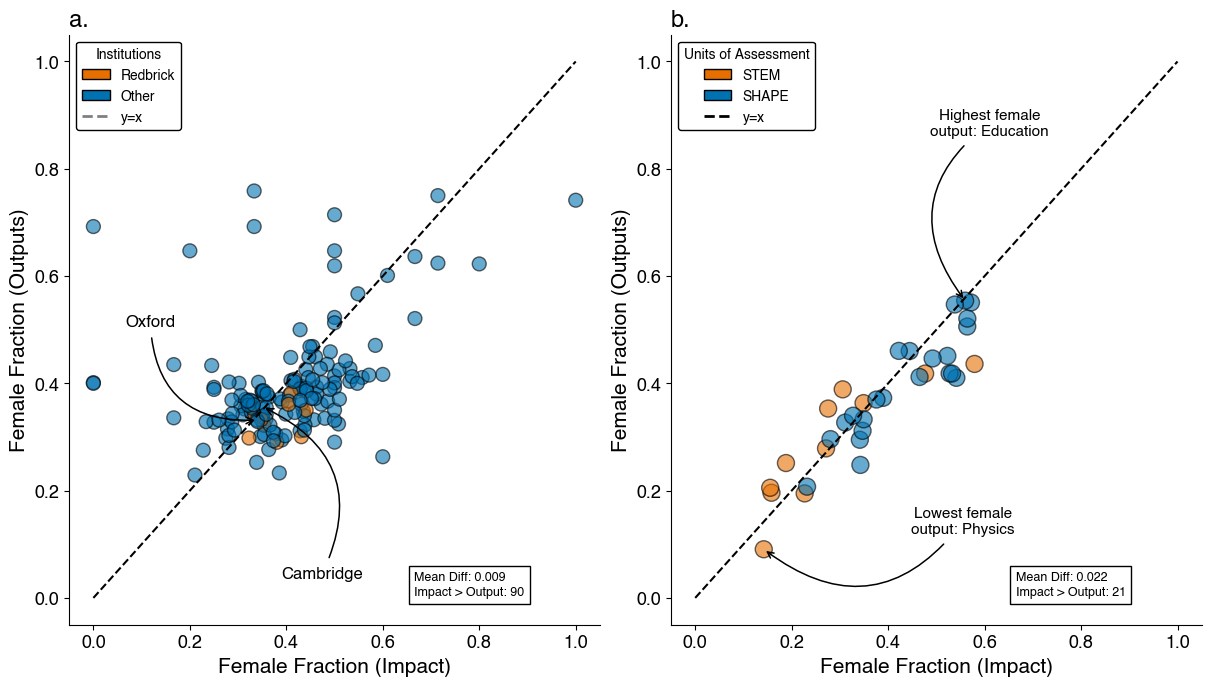

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Helvetica'

# ---------------------------------------------------------------------
# Parameters
# ---------------------------------------------------------------------
show_unit_names = True

# Colour palette (blue–orange)
COLOR_IMPACT_ORANGE = '#E76F00'  # Impact/STEM/RussellGroup
COLOR_OUTPUT_BLUE   = '#0072B2'  # Output/SHAPE/Other

# ---------------------------------------------------------------------
# Figure & axes
# ---------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12, 6.75), constrained_layout=True, sharex=False, sharey=False
)

# ============================================================
# (a) Institutions scatter
# ============================================================
colors_a = np.where(df_uni_m['RussellGroup'] == 1, COLOR_IMPACT_ORANGE, COLOR_OUTPUT_BLUE)

ax1.scatter(
    df_uni_m['pct_female_ics'],
    df_uni_m['pct_female_output'],
    alpha=0.6,
    s=100,
    c=colors_a,
    edgecolor='k'
)
ax1.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=1.5)

mean_diff_uni = (df_uni_m['pct_female_ics'] - df_uni_m['pct_female_output']).mean()
n_more_output_uni = (df_uni_m['pct_female_ics'] > df_uni_m['pct_female_output']).sum()

ax1.text(
    0.65, 0.05,
    f"Mean Diff: {mean_diff_uni:.3f}\nImpact > Output: {n_more_output_uni}",
    transform=ax1.transAxes,
    fontsize=9,
    bbox=dict(facecolor='white', alpha=1)
)

ax1.set_xlim(-0.05, 1.05)
ax1.set_ylim(-0.05, 1.05)
ax1.set_xticks(np.linspace(0, 1, 6))
ax1.set_yticks(np.linspace(0, 1, 6))
ax1.set_xlabel('Female Fraction (Impact)', fontsize=15)
ax1.set_ylabel('Female Fraction (Outputs)', fontsize=15)
ax1.set_title('a.', loc='left', fontweight='bold', fontsize=17)
#ax1.grid(linestyle='--', color='k', alpha=0.15)

legend_elements_a = [
    Patch(facecolor=COLOR_IMPACT_ORANGE, edgecolor='k', label='RussellGroup'),
    Patch(facecolor=COLOR_OUTPUT_BLUE,   edgecolor='k', label='Other'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='y=x')
]
ax1.legend(
    handles=legend_elements_a,
    title='Institutions',
    loc='upper left',
    frameon=True, edgecolor='k', facecolor=(1, 1, 1, 1), framealpha=1.0
)

# Annotations (Oxford, Cambridge)
_ox = df_uni_m[df_uni_m['Institution name'] == 'University of Oxford']
if not _ox.empty:
    _x, _y = _ox[['pct_female_ics', 'pct_female_output']].values[0]
    ax1.annotate(
        "Oxford", xy=(_x, _y), xytext=(0.20, 0.50), textcoords='axes fraction',
        fontsize=12, ha='right', va='bottom',
        arrowprops=dict(arrowstyle='->', lw=1.1, color='k', connectionstyle="arc3,rad=0.5"),
        bbox=dict(facecolor='white', edgecolor='none', alpha=1)
    )

_cam = df_uni_m[df_uni_m['Institution name'] == 'University of Cambridge']
if not _cam.empty:
    _x, _y = _cam[['pct_female_ics', 'pct_female_output']].values[0]
    ax1.annotate(
        "Cambridge", xy=(_x, _y), xytext=(0.40, 0.10), textcoords='axes fraction',
        fontsize=12, ha='left', va='top',
        arrowprops=dict(arrowstyle='->', lw=1.1, color='k', connectionstyle="arc3,rad=0.5"),
        bbox=dict(facecolor='white', edgecolor='none', alpha=1)
    )

# ============================================================
# (b) Units of Assessment scatter
# ============================================================
colors_b = np.where(df_uoa_m['Discipline_group'].eq('STEM'),
                    COLOR_IMPACT_ORANGE, COLOR_OUTPUT_BLUE)

ax2.scatter(
    df_uoa_m['pct_female_ics'],
    df_uoa_m['pct_female_output'],
    alpha=0.6,
    s=150,
    c=colors_b,
    edgecolor='k'
)
ax2.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=1.5)

mean_diff_uoa = (df_uoa_m['pct_female_ics'] - df_uoa_m['pct_female_output']).mean()
n_more_output_uoa = (df_uoa_m['pct_female_ics'] > df_uoa_m['pct_female_output']).sum()

ax2.text(
    0.65, 0.05,
    f"Mean Diff: {mean_diff_uoa:.3f}\nImpact > Output: {n_more_output_uoa}",
    transform=ax2.transAxes,
    fontsize=9,
    bbox=dict(facecolor='white', alpha=1)
)

ax2.set_xlim(-0.05, 1.05)
ax2.set_ylim(-0.05, 1.05)
ax2.set_xticks(np.linspace(0, 1, 6))
ax2.set_yticks(np.linspace(0, 1, 6))
ax2.set_xlabel('Female Fraction (Impact)', fontsize=15)
ax2.set_ylabel('Female Fraction (Outputs)', fontsize=15)
ax2.set_title('b.', loc='left', fontweight='bold', fontsize=17)
#ax2.grid(linestyle='--', color='k', alpha=0.15)

legend_elements_b = [
    Patch(facecolor=COLOR_IMPACT_ORANGE, edgecolor='k', label='STEM'),
    Patch(facecolor=COLOR_OUTPUT_BLUE,   edgecolor='k', label='SHAPE'),
    Line2D([0], [0], color='k', lw=2, linestyle='--', label='y=x')
]
ax2.legend(
    handles=legend_elements_b,
    title='Units of Assessment',
    loc='upper left',
    frameon=True, edgecolor='k', facecolor=(1, 1, 1, 1), framealpha=1.0
)

# Annotations: max/min female output
_idx_max = df_uoa_m['pct_female_output'].idxmax()
_idx_min = df_uoa_m['pct_female_output'].idxmin()
_row_max = df_uoa_m.loc[[_idx_max]]
_row_min = df_uoa_m.loc[[_idx_min]]
_x_max, _y_max = _row_max[['pct_female_ics', 'pct_female_output']].values[0]
_x_min, _y_min = _row_min[['pct_female_ics', 'pct_female_output']].values[0]
if show_unit_names:
    _label_max = f"Highest female\noutput: {_row_max['Unit of assessment name'].values[0]}"
    _label_min = f"Lowest female\noutput: {_row_min['Unit of assessment name'].values[0]}"
else:
    _label_max = f"Highest female output: UoA {int(_row_max['Unit of assessment number'].values[0])}"
    _label_min = f"Lowest female output: UoA {int(_row_min['Unit of assessment number'].values[0])}"

ax2.annotate(
    _label_max, xy=(_x_max, _y_max), xytext=(0.60, 0.85), textcoords='axes fraction',
    fontsize=11, ha='center', va='center',
    arrowprops=dict(arrowstyle='->', lw=1.1, color='k', connectionstyle="arc3,rad=0.5"),
    bbox=dict(facecolor='white', edgecolor='none', alpha=1)
)
ax2.annotate(
    _label_min, xy=(_x_min, _y_min), xytext=(0.55, 0.175), textcoords='axes fraction',
    fontsize=11, ha='center', va='center',
    arrowprops=dict(arrowstyle='->', lw=1.1, color='k', connectionstyle="arc3,rad=-0.5"),
    bbox=dict(facecolor='white', edgecolor='none', alpha=1)
)

# ---------------------------------------------------------------------
# Global formatting
# ---------------------------------------------------------------------
for ax in (ax1, ax2):
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.savefig('gender_scatter_panels.pdf', dpi=300)
plt.show()


/tmp/ipykernel_16474/3979195258.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dot_colors = [COLOR_IMPACT_ORANGE if disc_map.get(name) == 'STEM' else COLOR_OUTPUT_BLUE


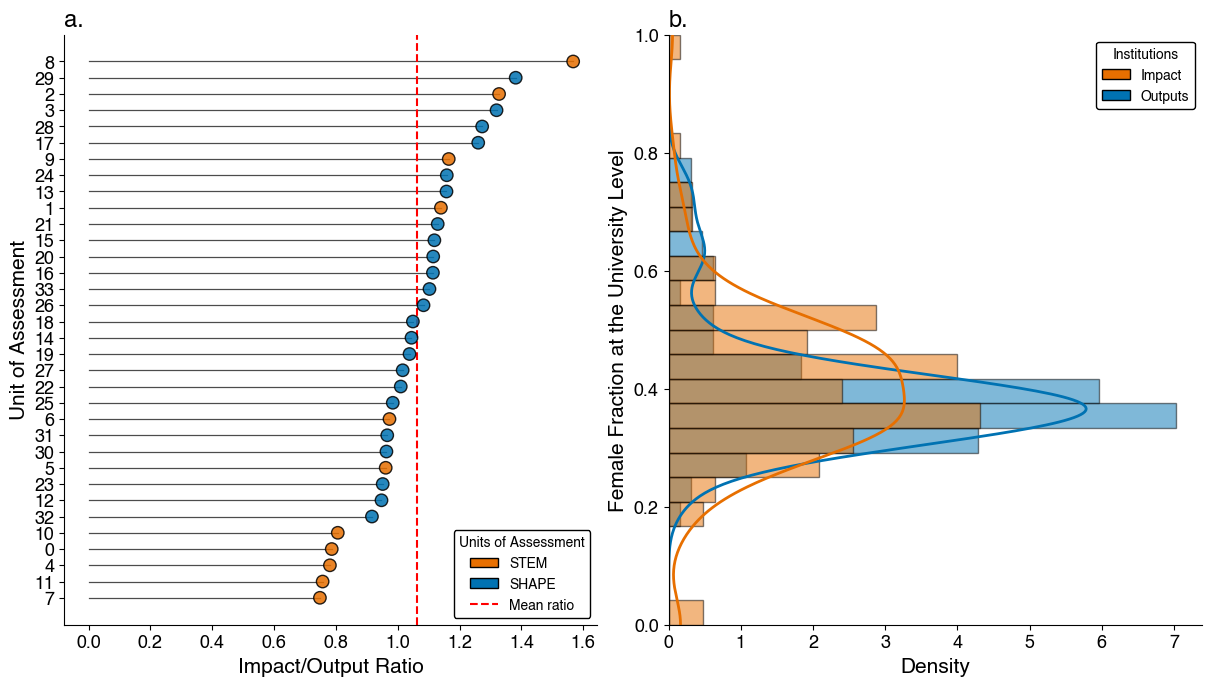

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Helvetica'

COLOR_IMPACT_ORANGE = '#E76F00'
COLOR_OUTPUT_BLUE   = '#0072B2'

# ---------------------------------------------------------------------
# Figure & axes  (dot plot left, histogram right)
# ---------------------------------------------------------------------
fig, (axb, axR) = plt.subplots(
    1, 2, figsize=(12, 6.75), constrained_layout=True, sharey=False
)

# ============================================================
# (c) LEFT: horizontal Impact/Output ratio DOT PLOT by UoA
# ============================================================
ratio_series = (df_uoa_m['pct_female_ics'] / df_uoa_m['pct_female_output']).dropna().sort_values(ascending=False)

# Colour points by Discipline_group (SHAPE / STEM)
disc_map = df_uoa_m.set_index('Unit of assessment name')['Discipline_group']
dot_colors = [COLOR_IMPACT_ORANGE if disc_map.get(name) == 'STEM' else COLOR_OUTPUT_BLUE
              for name in ratio_series.index]

positions = np.arange(len(ratio_series))

# --- Add black lines from y-axis to each dot ---
for y, x in zip(positions, ratio_series.values):
    axb.plot([0, x], [y, y], color='k', lw=.9, alpha=0.7, zorder=1)

# --- Scatter points on top ---
axb.scatter(
    ratio_series.values, positions,
    c=dot_colors, edgecolor='k', s=80, alpha=0.85, zorder=3
)

# Mean line
mean_ratio = ratio_series.mean()
axb.axvline(mean_ratio, color='r', linestyle='--', lw=1.5, label=f'Mean = {mean_ratio:.2f}', zorder=2)

# Styling
axb.set_title('a.', loc='left', fontweight='bold', fontsize=17)
axb.set_xlabel('Impact/Output Ratio', fontsize=15)
axb.set_ylabel('Unit of Assessment', fontsize=15)
axb.set_yticks(positions)
axb.set_yticklabels(ratio_series.index, fontsize=8)
axb.invert_yaxis()  # highest ratio on top
#axb.grid(linestyle='--', color='k', alpha=0.15, axis='x')

legend_elements_d = [
    Patch(facecolor=COLOR_IMPACT_ORANGE, edgecolor='k', label='STEM'),
    Patch(facecolor=COLOR_OUTPUT_BLUE,   edgecolor='k', label='SHAPE'),
    Line2D([0], [0], color='r', lw=1.5, linestyle='--', label='Mean ratio')
]
axb.legend(
    handles=legend_elements_d,
    loc='lower right',
    frameon=True, ncol=1, title='Units of Assessment',
    edgecolor='k', facecolor=(1, 1, 1, 1), framealpha=1.0
)

# ============================================================
# (d) RIGHT: rotated distributions (universities)
# ============================================================
ics = df_uni_m['pct_female_ics'].dropna()
output = df_uni_m['pct_female_output'].dropna()
bins = np.linspace(0, 1, 25)

axR.hist(output, bins=bins, density=True, alpha=0.5, label='Outputs',
         edgecolor='k', orientation='horizontal', color=COLOR_OUTPUT_BLUE)
axR.hist(ics, bins=bins, density=True, alpha=0.5, label='Impact',
         edgecolor='k', orientation='horizontal', color=COLOR_IMPACT_ORANGE)

x = np.linspace(0, 1, 400)
kde_out = gaussian_kde(output)
kde_ics = gaussian_kde(ics)
axR.plot(kde_out(x), x, color=COLOR_OUTPUT_BLUE,   lw=2)
axR.plot(kde_ics(x), x, color=COLOR_IMPACT_ORANGE, lw=2)

axR.set_ylim(0, 1)
axR.set_yticks(np.linspace(0, 1, 6))
axR.set_xlabel('Density', fontsize=15)
axR.set_ylabel('Female Fraction at the University Level', fontsize=15)
axR.set_title('b.', loc='left', fontweight='bold', fontsize=17)
#axR.grid(linestyle='--', color='k', alpha=0.15)
axR.spines['top'].set_visible(False)
axR.spines['right'].set_visible(False)

legend_elements_dist = [
    Patch(facecolor=COLOR_IMPACT_ORANGE, edgecolor='k', label='Impact'),
    Patch(facecolor=COLOR_OUTPUT_BLUE,   edgecolor='k', label='Outputs')
]
axR.legend(
    handles=legend_elements_dist,
    title='Institutions',
    loc='upper right',
    frameon=True, edgecolor='k', facecolor=(1, 1, 1, 1), framealpha=1.0
)

# ---------------------------------------------------------------------
# Global formatting
# ---------------------------------------------------------------------
for ax in (axb, axR):
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.savefig('gender_dot_lines_left_hist_right.pdf', dpi=300)
plt.show()


In [5]:
# ============================================================
# DESCRIPTIVE STATISTICS — Overview of gender representation
# ============================================================

import numpy as np
import pandas as pd

def safe_pct(a, b):
    return 100 * a / b if b else np.nan

print("============================================================")
print(" DESCRIPTIVE SUMMARY OF FEMALE REPRESENTATION IN ICS & OUTPUTS")
print("============================================================\n")

# --- 1. Overall female representation (raw)
n_fem_out = df_output['number_female'].sum()
n_male_out = df_output['number_male'].sum()
n_fem_ics = df_ics['number_female'].sum()
n_male_ics = df_ics['number_male'].sum()

pct_fem_out = safe_pct(n_fem_out, n_fem_out + n_male_out)
pct_fem_ics = safe_pct(n_fem_ics, n_fem_ics + n_male_ics)

print("Overall female share:")
print(f"  • Outputs: {n_fem_out:,} women / {n_fem_out + n_male_out:,} total = {pct_fem_out:.2f}% female")
print(f"  • ICS:     {n_fem_ics:,} women / {n_fem_ics + n_male_ics:,} total = {pct_fem_ics:.2f}% female\n")

# --- 2. All-women ICS cases
# We'll define an "all-women" ICS as a case with number_male == 0 and number_female > 0.
ics_all_female = df_ics[(df_ics['number_male'] == 0) & (df_ics['number_female'] > 0)]
n_all_fem_ics = len(ics_all_female)
pct_all_fem_ics = safe_pct(n_all_fem_ics, len(df_ics))

print(f"All-female ICS submissions (excluding unknowns): {n_all_fem_ics:,} ({pct_all_fem_ics:.2f}% of all ICS cases)\n")

# --- 3. By University: top and bottom female shares
top_uni = df_uni_m[['Institution name', 'pct_female_ics', 'pct_female_output']].dropna().sort_values('pct_female_ics', ascending=False)
bottom_uni = top_uni.sort_values('pct_female_ics', ascending=True)

print("Universities with highest female Impact (ICS) proportions:")
print(top_uni.head(5).to_string(index=False))
print("\nUniversities with lowest female Impact (ICS) proportions:")
print(bottom_uni.head(5).to_string(index=False))

# Difference (Impact - Output)
df_uni_m['diff_ics_output'] = df_uni_m['pct_female_ics'] - df_uni_m['pct_female_output']
print("\nUniversities with largest positive difference (ICS − Output):")
print(df_uni_m[['Institution name', 'pct_female_ics', 'pct_female_output', 'diff_ics_output']]
      .sort_values('diff_ics_output', ascending=False)
      .head(5)
      .to_string(index=False))
print("\nUniversities with largest negative difference (ICS − Output):")
print(df_uni_m[['Institution name', 'pct_female_ics', 'pct_female_output', 'diff_ics_output']]
      .sort_values('diff_ics_output', ascending=True)
      .head(5)
      .to_string(index=False))

# --- 4. By Unit of Assessment
df_uoa_m['diff_ics_output'] = df_uoa_m['pct_female_ics'] - df_uoa_m['pct_female_output']
top_uoa = df_uoa_m[['Unit of assessment name', 'pct_female_ics', 'pct_female_output']].dropna().sort_values('pct_female_ics', ascending=False)
bottom_uoa = top_uoa.sort_values('pct_female_ics', ascending=True)

print("\nUoAs with highest female Impact (ICS) proportions:")
print(top_uoa.head(5).to_string(index=False))
print("\nUoAs with lowest female Impact (ICS) proportions:")
print(bottom_uoa.head(5).to_string(index=False))

print("\nUoAs with largest positive difference (ICS − Output):")
print(df_uoa_m[['Unit of assessment name', 'pct_female_ics', 'pct_female_output', 'diff_ics_output']]
      .sort_values('diff_ics_output', ascending=False)
      .head(5)
      .to_string(index=False))
print("\nUoAs with largest negative difference (ICS − Output):")
print(df_uoa_m[['Unit of assessment name', 'pct_female_ics', 'pct_female_output', 'diff_ics_output']]
      .sort_values('diff_ics_output', ascending=True)
      .head(5)
      .to_string(index=False))

# --- 5. Breakdown by Discipline group
if 'Discipline_group' in df_uoa_m.columns:
    group_summary = (
        df_uoa_m.groupby('Discipline_group')[['pct_female_ics', 'pct_female_output']]
        .mean()
        .assign(diff=lambda d: d['pct_female_ics'] - d['pct_female_output'])
    )
    print("\nAverage female share by Discipline group (STEM vs SHAPE):")
    print(group_summary.round(3).to_string())

# --- 6. General summary statistics (distributions)
print("\nSummary statistics of female proportions across Universities and UoAs:")
print("Universities (Impact):")
print(df_uni_m['pct_female_ics'].describe().round(3).to_string())
print("\nUoAs (Impact):")
print(df_uoa_m['pct_female_ics'].describe().round(3).to_string())
print("\nUniversities (Outputs):")
print(df_uni_m['pct_female_output'].describe().round(3).to_string())
print("\nUoAs (Outputs):")
print(df_uoa_m['pct_female_output'].describe().round(3).to_string())

print("\n============================================================")
print(" End of descriptive section — proceeding to inferential tests")
print("============================================================\n")


 DESCRIPTIVE SUMMARY OF FEMALE REPRESENTATION IN ICS & OUTPUTS

Overall female share:
  • Outputs: 295,846.0 women / 854,366.0 total = 34.63% female
  • ICS:     5,960.0 women / 15,637.0 total = 38.11% female

All-female ICS submissions (excluding unknowns): 1,211 (19.04% of all ICS cases)

Universities with highest female Impact (ICS) proportions:
                    Institution name  pct_female_ics  pct_female_output
      Stranmillis University College        1.000000           0.741379
              Royal College of Music        0.800000           0.622642
Queen Margaret University, Edinburgh        0.714286           0.624060
          Courtauld Institute of Art        0.714286           0.750000
              The Metanoia Institute        0.666667           0.520833

Universities with lowest female Impact (ICS) proportions:
                               Institution name  pct_female_ics  pct_female_output
                            Kingston University        0.000000           0

In [6]:
# ================================================
# Inference: Is female ICS contribution > Outputs?
# ================================================
import numpy as np
import pandas as pd
from scipy import stats

ALPHA = 0.05
np.set_printoptions(suppress=True, precision=4)

# ----------------------------
# Utility functions
# ----------------------------
def wald_ci_proportion(p, n, alpha=ALPHA):
    """Wald CI for a single proportion."""
    if n <= 0 or np.isnan(p): 
        return (np.nan, np.nan)
    z = stats.norm.ppf(1 - alpha/2)
    se = np.sqrt(p*(1-p)/n)
    return (p - z*se, p + z*se)

def wald_ci_diff_proportions(p1, n1, p2, n2, alpha=ALPHA):
    """Unpooled Wald CI for difference of two proportions: (p1 - p2)."""
    if min(n1, n2) <= 0:
        return (np.nan, np.nan)
    z = stats.norm.ppf(1 - alpha/2)
    se = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
    diff = p1 - p2
    return (diff - z*se, diff + z*se)

def two_prop_ztest(count1, nobs1, count2, nobs2, alternative='larger', alpha=ALPHA):
    """
    Two-proportion z-test with pooled variance.
    Tests H0: p1 = p2 vs H1 depending on 'alternative'.
    Returns dict with statistics and explanation text.
    """
    p1 = count1 / nobs1
    p2 = count2 / nobs2
    p_pool = (count1 + count2) / (nobs1 + nobs2)
    se = np.sqrt(p_pool * (1 - p_pool) * (1/nobs1 + 1/nobs2))
    z = (p1 - p2) / se
    if alternative == 'two-sided':
        pval = 2 * (1 - stats.norm.cdf(abs(z)))
        alt_text = "p1 ≠ p2"
    elif alternative == 'larger':
        pval = 1 - stats.norm.cdf(z)
        alt_text = "p1 > p2"
    else:
        pval = stats.norm.cdf(z)
        alt_text = "p1 < p2"
    ci_lo, ci_hi = wald_ci_diff_proportions(p1, nobs1, p2, nobs2, alpha=alpha)
    signif = "statistically significant" if pval < alpha else "not statistically significant"
    direction = "positive" if (p1 - p2) > 0 else ("negative" if (p1 - p2) < 0 else "zero")
    explanation = (
        f"z = {z:.3f}, p = {pval:.3g} (H0: p1 = p2 vs H1: {alt_text}). "
        f"Observed difference p1−p2 = {p1 - p2:+.4f} [{ci_lo:+.4f}, {ci_hi:+.4f}] (95% CI, Wald, unpooled). "
        f"Result is {signif} at α={alpha}; the estimated difference is {direction}."
    )
    return {"z": z, "p": pval, "diff": p1 - p2, "ci": (ci_lo, ci_hi), "explanation": explanation}

def describe_prop(name, p, n, alpha=ALPHA):
    lo, hi = wald_ci_proportion(p, n, alpha)
    print(f"{name}: p̂ = {p:.4f}  (95% CI [{lo:.4f}, {hi:.4f}]), n = {n}")

def paired_suite(label, x_ics, x_out, alpha=ALPHA):
    """
    One-sided paired tests for Δ = ICS - Output (proportions already computed per group).
    Runs:
      • one-sample t-test (mean Δ > 0),
      • Wilcoxon signed-rank (median Δ > 0),
      • Sign/binomial test (P(Δ>0) > 0.5).
    Prints descriptive stats and plain-language interpretations.
    """
    df = pd.DataFrame({"ics": x_ics, "out": x_out}).dropna()
    d = (df["ics"] - df["out"]).to_numpy()
    n = d.size
    mean_d = d.mean()
    sd_d = d.std(ddof=1) if n > 1 else np.nan
    z = stats.norm.ppf(1 - alpha/2)
    se = (sd_d / np.sqrt(n)) if n > 1 else np.nan
    ci = (mean_d - z*se, mean_d + z*se) if n > 1 else (np.nan, np.nan)
    dz = mean_d / sd_d if (n > 1 and sd_d > 0) else np.nan  # Cohen's dz (paired)
    print(f"\n— {label}: paired analysis for Δ = (ICS − Output)")
    print(f"  Descriptives: n = {n}, mean(Δ) = {mean_d:.4f} (95% CI [{ci[0]:.4f}, {ci[1]:.4f}]), sd = {sd_d:.4f}, Cohen's dz = {dz:.3f}")

    # t-test (one-sided, mean Δ > 0)
    if n >= 2:
        t_stat, p_t = stats.ttest_1samp(d, 0.0, alternative='greater')
        signif_t = "significant" if p_t < alpha else "not significant"
        direction_t = "positive" if mean_d > 0 else ("negative" if mean_d < 0 else "zero")
        print(f"  t-test (mean Δ > 0): t = {t_stat:.3f}, p = {p_t:.3g} → {signif_t} at α={alpha} (mean Δ {direction_t}).")
    else:
        print("  t-test: not applicable (n<2).")

    # Wilcoxon signed-rank (median Δ > 0)
    d_nz = d[d != 0]
    if d_nz.size > 0:
        try:
            w_stat, p_w = stats.wilcoxon(d_nz, alternative='greater', zero_method='wilcox', correction=False)
            med = np.median(d)
            signif_w = "significant" if p_w < alpha else "not significant"
            direction_w = "positive" if med > 0 else ("negative" if med < 0 else "zero")
            print(f"  Wilcoxon (median Δ > 0): W = {w_stat:.3f}, p = {p_w:.3g} → {signif_w} (median Δ {direction_w}).")
        except Exception as e:
            print(f"  Wilcoxon: not computed ({e}).")
    else:
        print("  Wilcoxon: all differences are zero; test not applicable.")

    # Sign test (P(Δ>0) > 0.5)
    n_pos = int(np.sum(d > 0))
    n_neg = int(np.sum(d < 0))
    n_eff = n_pos + n_neg
    if n_eff > 0:
        p_bin = stats.binomtest(n_pos, n_eff, p=0.5, alternative='greater').pvalue
        frac_pos = n_pos / n_eff
        signif_s = "significant" if p_bin < alpha else "not significant"
        print(f"  Sign test (P(Δ>0) > 0.5): positives = {n_pos}/{n_eff} ({frac_pos:.3%}), p = {p_bin:.3g} → {signif_s}.")
    else:
        print("  Sign test: no nonzero differences; not applicable.")

# ----------------------------
# 0) Overview
# ----------------------------
print("Hypothesis across all levels: female proportion in ICS exceeds Outputs (one-sided tests).\n")

# ----------------------------
# 1) RAW (pooled) level: two-proportion z-test
# ----------------------------
x_ics = int(df_ics['number_female'].sum())
n_ics = int((df_ics['number_female'] + df_ics['number_male']).sum())
x_out = int(df_output['number_female'].sum())
n_out = int((df_output['number_female'] + df_output['number_male']).sum())

p_ics = x_ics / n_ics if n_ics > 0 else np.nan
p_out = x_out / n_out if n_out > 0 else np.nan

print("RAW pooled female shares:")
describe_prop("  ICS   ", p_ics, n_ics, alpha=ALPHA)
describe_prop("  Output", p_out, n_out, alpha=ALPHA)

res = two_prop_ztest(x_ics, n_ics, x_out, n_out, alternative='larger', alpha=ALPHA)
print("\nTwo-proportion z-test (RAW):")
print("  H0: p_ICS = p_Output   vs   H1: p_ICS > p_Output")
print(" ", res["explanation"])
print("  Interpretation: This tests the overall female share across all observations. A significant result supports higher ICS share.")

# ----------------------------
# 2) UNIVERSITY level: paired tests on proportions per university
# ----------------------------
uni = df_uni_m[['pct_female_ics', 'pct_female_output']].dropna()
paired_suite("University level", uni['pct_female_ics'], uni['pct_female_output'], alpha=ALPHA)
print("  Interpretation: Positive, significant results indicate universities tend to have higher female shares in ICS than in Outputs.")

# ----------------------------
# 3) UoA level: paired tests on proportions per UoA
# ----------------------------
uoa = df_uoa_m[['pct_female_ics', 'pct_female_output']].dropna()
paired_suite("Unit of Assessment (UoA) level", uoa['pct_female_ics'], uoa['pct_female_output'], alpha=ALPHA)
print("  Interpretation: Positive, significant results indicate disciplines (UoAs) tend to have higher female shares in ICS.")

# ----------------------------
# 4) Institution × UoA (fine-grained pairs)
# ----------------------------
if {'pct_female_ics','pct_female_output'}.issubset(df_uniuoa_m.columns):
    uniuoa = df_uniuoa_m[['pct_female_ics', 'pct_female_output']].dropna()
    paired_suite("Institution × UoA level", uniuoa['pct_female_ics'], uniuoa['pct_female_output'], alpha=ALPHA)
    print("  Interpretation: At the cell level, a significant positive Δ indicates the tendency persists at finer granularity.")
else:
    print("\nInstitution × UoA level: required columns not present; skipping.")

# ----------------------------
# 5) Compact recap
# ----------------------------
print("\nRECAP:")
print("  • RAW z-test asks: Is the *overall* female share higher in ICS than in Outputs?")
print("  • Paired tests (University, UoA, and Inst×UoA) ask: Within each unit, is ICS share higher than Outputs (Δ>0)?")
print("  • Convergent significance across multiple tests provides robust evidence that female ICS contribution exceeds Output.")


Hypothesis across all levels: female proportion in ICS exceeds Outputs (one-sided tests).

RAW pooled female shares:
  ICS   : p̂ = 0.3811  (95% CI [0.3735, 0.3888]), n = 15637
  Output: p̂ = 0.3463  (95% CI [0.3453, 0.3473]), n = 854366

Two-proportion z-test (RAW):
  H0: p_ICS = p_Output   vs   H1: p_ICS > p_Output
  z = 9.079, p = 0 (H0: p1 = p2 vs H1: p1 > p2). Observed difference p1−p2 = +0.0349 [+0.0272, +0.0426] (95% CI, Wald, unpooled). Result is statistically significant at α=0.05; the estimated difference is positive.
  Interpretation: This tests the overall female share across all observations. A significant result supports higher ICS share.

— University level: paired analysis for Δ = (ICS − Output)
  Descriptives: n = 150, mean(Δ) = 0.0087 (95% CI [-0.0123, 0.0298]), sd = 0.1314, Cohen's dz = 0.066
  t-test (mean Δ > 0): t = 0.814, p = 0.209 → not significant at α=0.05 (mean Δ positive).
  Wilcoxon (median Δ > 0): W = 7114.000, p = 0.00323 → significant (median Δ positive)